# MIRA: Final Project 2023
Professor: Josep Quintana, Robert Martí

Topic: Image registration of chest CT volumes: 4DCT DIR-Lab Challenge

Taiabur


In [1]:
import argparse
import tempfile
import SimpleITK as sitk
import os
import matplotlib.pyplot as plt
import pandas as pd
import glob
import ast

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  
import nibabel as nib
from typing import Tuple
from pathlib import Path
from utils.helper import compute_tre, load_landmarks, load_image
from utils.visualize import display_images_two_column, load_and_visualize_landmarks, visualize_registration

/var/folders/zp/kn2c7zks0q55p6_3s3c4b97h0000gn/T/ipykernel_8844/2577540071.py:6: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


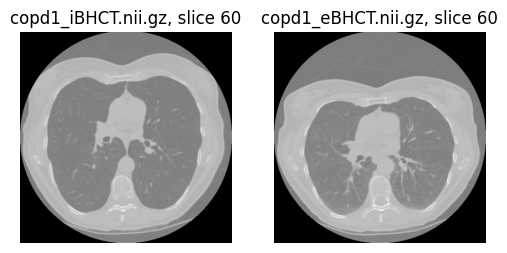

In [2]:
# Read the CSV file into a DataFrame
csv_file_path =  "dataset/csv/4DCT_df.csv"
df = pd.read_csv(csv_file_path)
df = df.sort_values(by='COPD_Type')
 
for index, row in df.iterrows():
    if index < 1:
        copd_type = row['COPD_Type']
        _dir = row['folder_path']
        iImage_name = row['cvt_inhale_image']
        eImage_name = row['cvt_exhale_image']

        iLandmark = row['inhale_landmark']
        eLandmark = row['exhale_landmark']

        iImage = os.path.join(_dir, iImage_name)
        eImage = os.path.join(_dir, eImage_name)

        # print(img1_path)
        # print(img2_path)

        # print(_df['ImageName'].values[1])

        img1= sitk.ReadImage(iImage)
        img2= sitk.ReadImage(eImage)

        display_images_two_column(img1, iImage_name, img2,eImage_name)


0
/Users/taiaburrahman/Desktop/git/chest_ct_registration/dataset/train/copd1/copd1_300_iBH_xyz_r1.txt
/Users/taiaburrahman/Desktop/git/chest_ct_registration/dataset/train/copd1/copd1_300_eBH_xyz_r1.txt


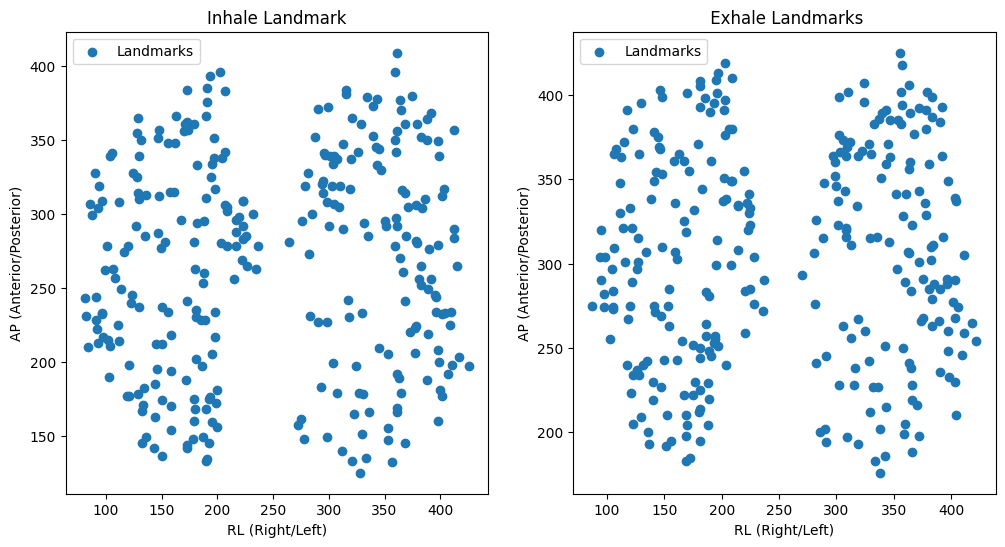

1
2
3


In [3]:
for index, row in df.iterrows():
    if index < 1:
        copd_type = row['COPD_Type']
        _dir = row['folder_path']
        iImage = row['cvt_inhale_image']
        eImage = row['cvt_exhale_image']

        iLandmark = row['inhale_landmark']
        eLandmark = row['exhale_landmark']

        iImage = os.path.join(_dir, iImage)
        eImage = os.path.join(_dir, eImage)

        inhale_landmark_path = os.path.join(_dir, iLandmark)
        exhale_landmark_path = os.path.join(_dir, eLandmark)
        
    
        print(inhale_landmark_path)
        print(exhale_landmark_path)
        # Load and visualize landmarks
        load_and_visualize_landmarks(inhale_landmark_path, exhale_landmark_path, title1= 'Inhale Landmark', title2= ' Exhale Landmarks')

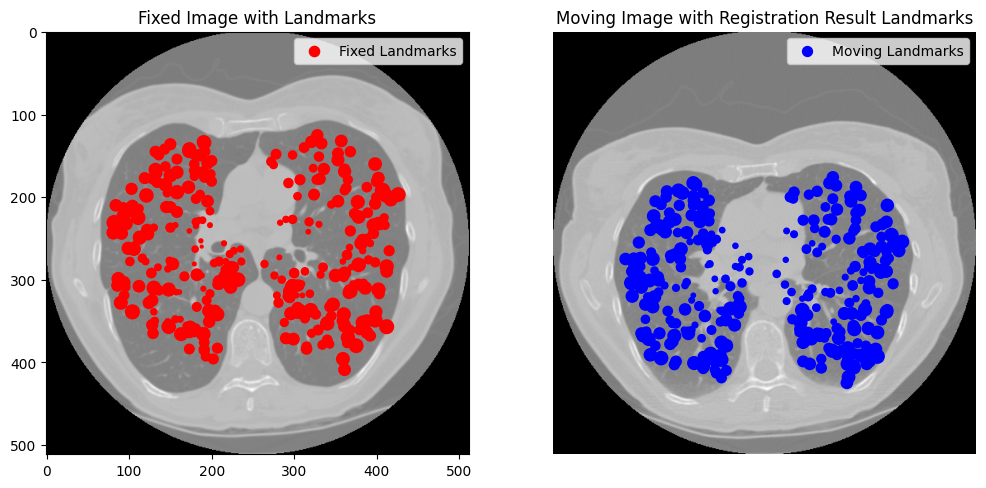

In [4]:
for index, row in df.iterrows():
    if index < 1:
        copd_type = row['COPD_Type']
        _dir = row['folder_path']
        iImage = row['inhale_image']
        eImage = row['exhale_image']

        iLandmark = row['inhale_landmark']
        eLandmark = row['exhale_landmark']

        # Constructing file paths for inhale and exhale images
        _file1 = os.path.splitext(iImage)[0]
        iImage = os.path.join(_dir, _file1 + ".nii.gz")

        _file2 = os.path.splitext(eImage)[0]
        eImage = os.path.join(_dir, _file2 + ".nii.gz")

        # Constructing paths for inhale and exhale landmarks
        inhale_landmark_path = os.path.join(_dir, iLandmark)
        exhale_landmark_path = os.path.join(_dir, eLandmark)

        # Printing paths
        # print(inhale_landmark_path)
        # print(exhale_landmark_path)

        # Loading images
        inhale_image = load_image(iImage)
        exhale_image = load_image(eImage)

        # Loading landmarks
        exhale_landmarks = load_landmarks(exhale_landmark_path)
        inhale_landmarks = load_landmarks(inhale_landmark_path)

        # Visualize registration
        visualize_registration(inhale_image, exhale_image, inhale_landmarks, exhale_landmarks)

Need to remove first two line of each inheal landmark txt file. like (index and 300)

In [5]:
from tabulate import tabulate

table = []
for index, row in df.iterrows():
    copd_type = row['COPD_Type']
    _dir = row['folder_path']
    iImage = row['cvt_inhale_image']
    eImage = row['cvt_exhale_image']

    iLandmark = row['inhale_landmark']
    eLandmark = row['exhale_landmark']

    source_mean = row['DisplacementMean']
    source_std = row['DisplacementStd']
    inhale_image_path = os.path.join(_dir, iImage)

    inhale_landmark_path = os.path.join(_dir, iLandmark)
    exhale_landmark_path = os.path.join(_dir, eLandmark)

    # print(inhale_landmark_path)
    # print(exhale_landmark_path)
    # Load landmarks
    exhale_landmarks = load_landmarks(exhale_landmark_path)
    inhale_landmarks = load_landmarks(inhale_landmark_path)
    
    calculate_mean, calculate_std =  compute_tre(inhale_image_path, inhale_landmarks, exhale_landmarks)
    
    table.append([
            f"{row['COPD_Type']}",
            f"{source_mean:.4f} ± {source_std:.4f}", 
            f"{calculate_mean:.4f} ± {calculate_std:.4f}",
    ])

print(tabulate(table, headers=['COPD_Type','Source (TRE) :Mean ± STD (mm)','Calculated (TRE) :Mean ± STD (mm)'], tablefmt="grid"))

+-------------+---------------------------------+-------------------------------------+
| COPD_Type   | Source (TRE) :Mean ± STD (mm)   | Calculated (TRE) :Mean ± STD (mm)   |
+=============+=================================+=====================================+
| copd1       | 25.9000 ± 11.5700               | 26.3342 ± 11.4179                   |
+-------------+---------------------------------+-------------------------------------+
| copd2       | 21.7700 ± 6.4600                | 21.7860 ± 6.4605                    |
+-------------+---------------------------------+-------------------------------------+
| copd3       | 12.2900 ± 6.3900                | 12.6392 ± 6.3843                    |
+-------------+---------------------------------+-------------------------------------+
| copd4       | 30.9000 ± 13.4900               | 29.5836 ± 12.9242                   |
+-------------+---------------------------------+-------------------------------------+
